In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [5]:
os.listdir('rps1/')

['rps2',
 'rock',
 'paper',
 'models',
 'README_rpc-cv-images.txt',
 'rps1.pkl',
 'rps2.pkl',
 'scissors']

In [1]:
path1 = 'rps1/'
path2 = 'rps2/'
path3 = 'rps'

In [9]:
tfms = get_transforms(max_zoom=0)
data = ImageDataBunch.from_folder(path3, valid_pct=.25, ds_tfms=tfms, size=128, bs=64,test='test')

In [10]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2739 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
rock,rock,rock,rock,rock
Path: rps;

Valid: LabelList (913 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
paper,scissor,paper,scissor,rock
Path: rps;

Test: LabelList (10 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: rps

'paper'

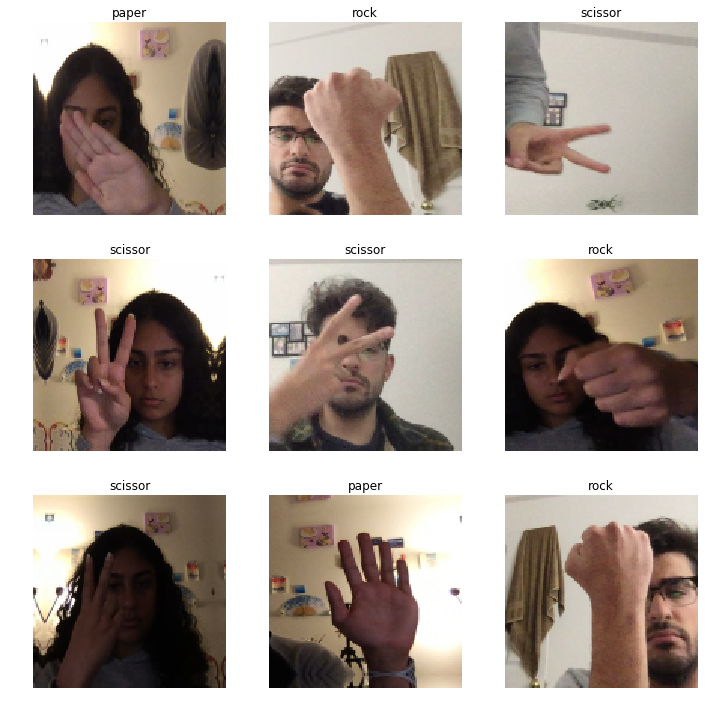

In [32]:
data.show_batch(figsize=(10,10), rows=3)
data.classes[0]

In [12]:
learner = cnn_learner(data, models.resnet101, metrics=[error_rate, accuracy, Recall(),Precision()], callback_fns=ShowGraph)

In [13]:
learner.load('rps2')

Learner(data=ImageDataBunch;

Train: LabelList (2739 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
rock,rock,rock,rock,rock
Path: rps;

Valid: LabelList (913 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
paper,scissor,paper,scissor,rock
Path: rps;

Test: LabelList (10 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: rps, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 6

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


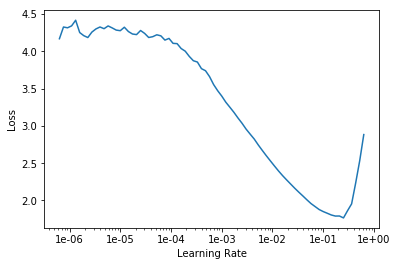

In [14]:
# learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [15]:
lr = 1e-3

epoch,train_loss,valid_loss,error_rate,accuracy,recall,precision,time
0,2.482234,0.674599,0.152245,0.847755,0.842930,0.848409,00:13
1,0.986087,0.135969,0.046002,0.953998,0.952483,0.953752,00:12
2,0.479388,0.086790,0.025192,0.974808,0.974069,0.975545,00:12
3,0.266813,0.061691,0.017525,0.982475,0.982009,0.983143,00:12
4,0.168191,0.056317,0.018620,0.981380,0.980851,0.982190,00:12


/opt/conda/envs/fastai/lib/python3.6/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


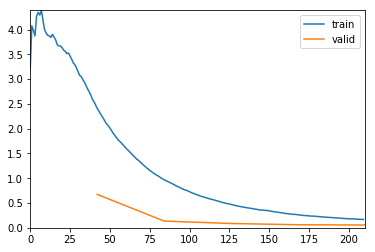

In [16]:
learner.fit_one_cycle(5, slice(lr),wd=.01)

In [17]:
learner.save('rps')

In [35]:
learner.export('rps.pkl')

In [168]:
test_data = ImageList.from_folder('rps_test/')

In [169]:
learner = load_learner('rps1/','rps2.pkl', test=test_data)

In [24]:
preds, y,losses = learner.get_preds(ds_type=DatasetType.Test, with_loss=True)

In [33]:
preds = preds.tolist()

In [34]:
for img, pred in zip(data.test_dl.items, preds):
    print(img, data.classes[pred.index(max(pred))])

rps/test/pap3.jpg paper
rps/test/pap2.jpg paper
rps/test/sc4.jpg scissor
rps/test/pap1.jpg paper
rps/test/rk3.jpg rock
rps/test/sc3.jpg scissor
rps/test/rk1.jpg rock
rps/test/sc1.jpg scissor
rps/test/sc2.jpg scissor
rps/test/rk2.jpg rock
